Метрики сравнения с эталоном:
MSE  = 4295.258734
MAE  = 28.908042
MAPE = 118.88%


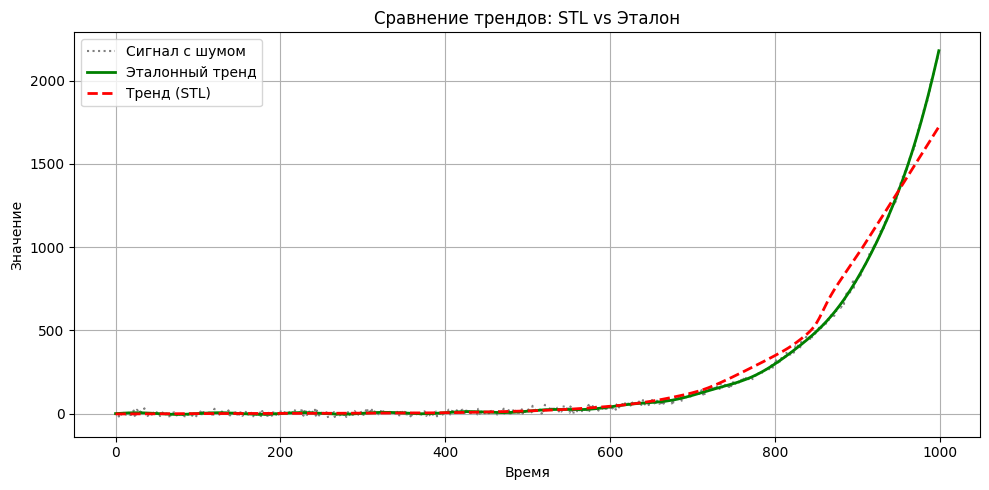

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error, mean_absolute_error

input_file = 'exponential_series.csv'             
reference_file = 'exponential_trend_only.csv'  
output_file = 'trend_stl.csv'

signal = pd.read_csv(input_file)
reference = pd.read_csv(reference_file)

y = signal.iloc[:, 0].values  
t = np.arange(len(y))
ref_trend = reference.iloc[:, 0].values 

stl = STL(y, period=max(2, len(y) // 10), robust=True) 
res = stl.fit()
trend = res.trend

mse = mean_squared_error(ref_trend, trend)
mae = mean_absolute_error(ref_trend, trend)
mape = np.mean(np.abs((ref_trend - trend) / ref_trend)) * 100

print("Метрики сравнения с эталоном:")
print(f"MSE  = {mse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE = {mape:.2f}%")

df_out = pd.DataFrame({
    'time': t,
    'original': y,
    'extracted_trend': trend,
    'reference_trend': ref_trend
})
df_out.to_csv(output_file, index=False)

plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Сигнал с шумом', linestyle=':', color='gray')
plt.plot(t, ref_trend, label='Эталонный тренд', linewidth=2, color='green')
plt.plot(t, trend, label='Тренд (STL)', linewidth=2, linestyle='--', color='red')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Сравнение трендов: STL vs Эталон')
plt.grid(True)
plt.tight_layout()
plt.show()



Метрики сравнения с эталоном (скользящее среднее):
MSE  = 66.481467
MAE  = 2.556187
MAPE = 79.85%


C:\Users\Artur\AppData\Local\Temp\ipykernel_18612\1334533946.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = trend.fillna(method='bfill').fillna(method='ffill')  # заполнение краёв


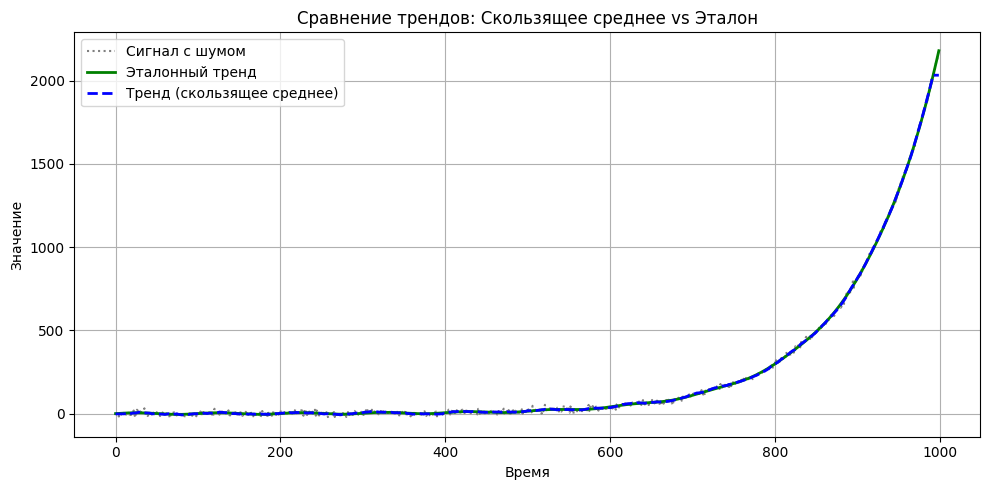

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

input_file = 'exponential_series.csv'             
reference_file = 'exponential_trend_only.csv'  
output_file = 'trend_moving_avg.csv'        
window_size = 15                  

signal = pd.read_csv(input_file)
reference = pd.read_csv(reference_file)

y = signal.iloc[:, 0].values
t = np.arange(len(y))
ref_trend = reference.iloc[:, 0].values

trend = pd.Series(y).rolling(window=window_size, center=True).mean()
trend = trend.fillna(method='bfill').fillna(method='ffill')  # заполнение краёв

mse = mean_squared_error(ref_trend, trend)
mae = mean_absolute_error(ref_trend, trend)
mape = np.mean(np.abs((ref_trend - trend) / ref_trend)) * 100

print("Метрики сравнения с эталоном (скользящее среднее):")
print(f"MSE  = {mse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE = {mape:.2f}%")

df_out = pd.DataFrame({
    'time': t,
    'original': y,
    'extracted_trend': trend,
    'reference_trend': ref_trend
})
df_out.to_csv(output_file, index=False)

plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Сигнал с шумом', linestyle=':', color='gray')
plt.plot(t, ref_trend, label='Эталонный тренд', linewidth=2, color='green')
plt.plot(t, trend, label='Тренд (скользящее среднее)', linewidth=2, linestyle='--', color='blue')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Сравнение трендов: Скользящее среднее vs Эталон')
plt.grid(True)
plt.tight_layout()
plt.show()


Метрики сравнения с эталоном (полином степени 10):
MSE  = 12.384935
MAE  = 3.147836
MAPE = 98.77%


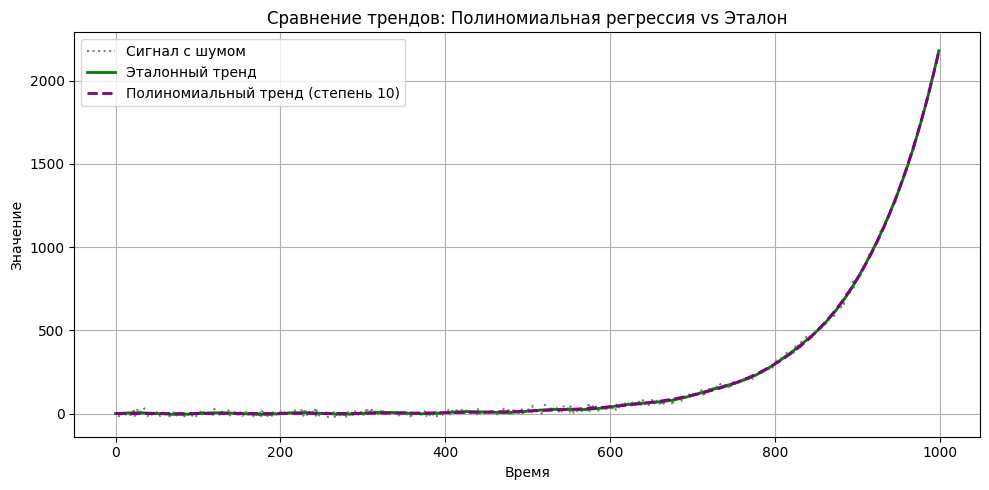

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

input_file = 'exponential_series.csv'             
reference_file = 'exponential_trend_only.csv'    
output_file = 'trend_polynomial.csv'
degree = 10  # степень полинома

signal = pd.read_csv(input_file)
reference = pd.read_csv(reference_file)

y = signal.iloc[:, 0].values
t = np.arange(len(y)).reshape(-1, 1)
ref_trend = reference.iloc[:, 0].values

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(t)
model = LinearRegression().fit(X_poly, y)
trend = model.predict(X_poly)

mse = mean_squared_error(ref_trend, trend)
mae = mean_absolute_error(ref_trend, trend)
mape = np.mean(np.abs((ref_trend - trend) / ref_trend)) * 100

print(f"Метрики сравнения с эталоном (полином степени {degree}):")
print(f"MSE  = {mse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE = {mape:.2f}%")

df_out = pd.DataFrame({
    'time': t.flatten(),
    'original': y,
    'extracted_trend': trend,
    'reference_trend': ref_trend
})
df_out.to_csv(output_file, index=False)

plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Сигнал с шумом', linestyle=':', color='gray')
plt.plot(t, ref_trend, label='Эталонный тренд', linewidth=2, color='green')
plt.plot(t, trend, label=f'Полиномиальный тренд (степень {degree})', linewidth=2, linestyle='--', color='purple')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Сравнение трендов: Полиномиальная регрессия vs Эталон')
plt.grid(True)
plt.tight_layout()
plt.show()
